In [1]:
import tensorflow as tf
from sklearn.datasets import make_circles

2022-07-11 12:28:29.426146: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-11 12:28:29.426209: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
n_samples = 1000
x, y = make_circles(n_samples, noise=0.03, random_state=42)
x.shape, y.shape

((1000, 2), (1000,))

In [3]:
import pandas as pd

cicrles = pd.DataFrame({"X0":x[:, 0],"X1":x[:, 1],"label":y})

In [4]:
cicrles.head(), cicrles.value_counts()


(         X0        X1  label
 0  0.754246  0.231481      1
 1 -0.756159  0.153259      1
 2 -0.815392  0.173282      1
 3 -0.393731  0.692883      1
 4  0.442208 -0.896723      0,
 X0         X1         label
 -1.059502   0.224777  0        1
  0.453339   0.892714  0        1
  0.418715   0.684283  1        1
  0.422111  -0.937240  0        1
  0.422801  -0.708743  1        1
                               ..
 -0.423395   0.687718  1        1
 -0.421819  -0.679585  1        1
 -0.418343  -0.678254  1        1
 -0.417656  -0.640403  1        1
  1.033712  -0.046817  0        1
 Length: 1000, dtype: int64)

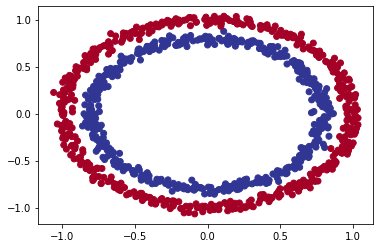

In [5]:
import matplotlib.pyplot as plt
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [6]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
	tf.keras.layers.Dense(6, activation='relu'),
	tf.keras.layers.Dense(6, activation='relu'),
	tf.keras.layers.Dense(6, activation='relu'),
	tf.keras.layers.Dense(6, activation='relu'),
	tf.keras.layers.Dense(6, activation='relu'),
	tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
 metrics=['accuracy']
#  metrics=[tf.keras.metrics.Accuracy()]
)

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

history = model_1.fit(x, y, epochs=500, callbacks=[callback])

2022-07-11 12:28:55.634019: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-07-11 12:28:55.634090: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-07-11 12:28:55.634125: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DESKTOP-SaHeB): /proc/driver/nvidia/version does not exist


Epoch 1/500
32/32 [==============================] - 3s 2ms/step - loss: 0.6934 - accuracy: 0.5030
Epoch 2/500
32/32 [==============================] - 0s 3ms/step - loss: 0.6919 - accuracy: 0.5340
Epoch 3/500
32/32 [==============================] - 0s 3ms/step - loss: 0.6907 - accuracy: 0.5160
Epoch 4/500
32/32 [==============================] - 0s 3ms/step - loss: 0.6893 - accuracy: 0.5390
Epoch 5/500
32/32 [==============================] - 0s 3ms/step - loss: 0.6877 - accuracy: 0.5680
Epoch 6/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6855 - accuracy: 0.5110
Epoch 7/500
32/32 [==============================] - 0s 3ms/step - loss: 0.6822 - accuracy: 0.6050
Epoch 8/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6785 - accuracy: 0.5390
Epoch 9/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6736 - accuracy: 0.5910
Epoch 10/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6679 - accuracy: 0.5530
Epoch 11/

In [7]:
model_1.evaluate(x, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 1.0000


[0.0018262058729305863, 1.0]

<AxesSubplot:>

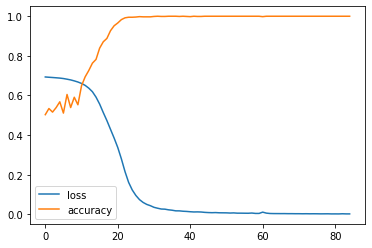

In [8]:
pd.DataFrame(history.history).plot()

In [9]:
import numpy as np

def plot_decision_boundary(model, x, y):

  #  Define a axis boundaries of the plot and create a meshgrid
  x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
  y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1

  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

  #  Create X values
  x_in = np.c_[xx.ravel(), yy.ravel()] # stacked two arrays together

  # Make prediction
  y_pred = model.predict(x_in)

  if len(y_pred[0]) > 1:
    print('doing multiclass classification')

    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)

  else:
    print('binary classification')

    y_pred = np.round(y_pred).reshape(xx.shape)

  # plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(x[:,0],x[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 1ms/step
binary classification


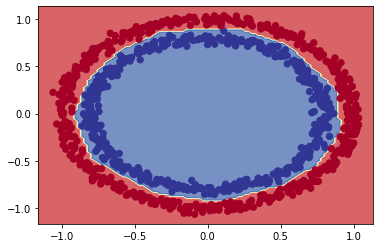

In [10]:
plot_decision_boundary(model_1, x, y)

In [30]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

x, y = make_moons(n_samples=1000, shuffle=True, random_state=42)
x_train,x_test,y_train, y_test  = train_test_split(x, y, test_size=0.2, random_state=42)

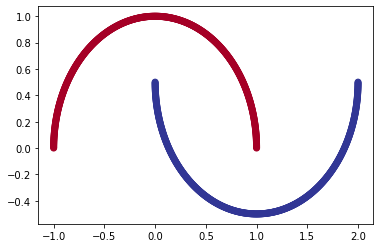

In [31]:
cicrles = pd.DataFrame({"X0":x[:, 0],"X1":x[:, 1],"label":y})
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.RdYlBu)


In [34]:
tf.random.set_seed(42)

model_moon = tf.keras.Sequential([
	tf.keras.layers.Dense(32, activation='relu'),
	tf.keras.layers.Dense(10, activation='relu'),
	# tf.keras.layers.Dense(6, activation='relu'),
	# tf.keras.layers.Dense(6, activation='relu'),
	# tf.keras.layers.Dense(6, activation='relu'),
	tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

model_moon.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
 metrics=['accuracy']
)

callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=3)

history_moons = model_moon.fit(x_train, y_train, epochs=500, callbacks=[callback])

Epoch 1/500
25/25 [==============================] - 1s 3ms/step - loss: 0.5878 - accuracy: 0.5500
Epoch 2/500
25/25 [==============================] - 0s 3ms/step - loss: 0.5328 - accuracy: 0.7788
Epoch 3/500
25/25 [==============================] - 0s 3ms/step - loss: 0.4956 - accuracy: 0.8512
Epoch 4/500
25/25 [==============================] - 0s 3ms/step - loss: 0.4688 - accuracy: 0.8650
Epoch 5/500
25/25 [==============================] - 0s 3ms/step - loss: 0.4425 - accuracy: 0.8712
Epoch 6/500
25/25 [==============================] - 0s 3ms/step - loss: 0.4050 - accuracy: 0.8750
Epoch 7/500
25/25 [==============================] - 0s 3ms/step - loss: 0.3599 - accuracy: 0.8813
Epoch 8/500
25/25 [==============================] - 0s 3ms/step - loss: 0.3209 - accuracy: 0.8838
Epoch 9/500
25/25 [==============================] - 0s 3ms/step - loss: 0.2910 - accuracy: 0.8888
Epoch 10/500
25/25 [==============================] - 0s 3ms/step - loss: 0.2655 - accuracy: 0.8963
Epoch 11/

In [27]:
model_1.evaluate(x,y)

32/32 [==============================] - 0s 3ms/step - loss: 1.3544e-07 - accuracy: 1.0000


[1.3543937882332102e-07, 1.0]

<AxesSubplot:>

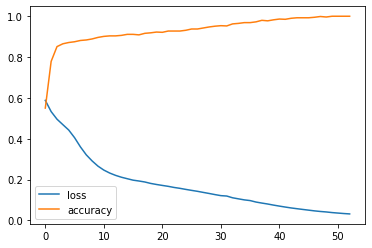

In [35]:
pd.DataFrame(history_moons.history).plot()


313/313 [==============================] - 1s 2ms/step
binary classification


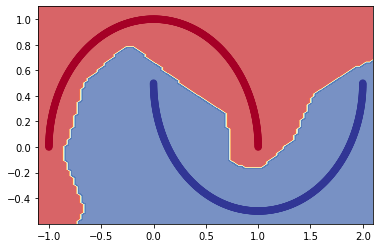

In [36]:
plot_decision_boundary(model_1, x, y)


In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(train_data,train_label), (test_data,test_label) = fashion_mnist.load_data()

2022-07-11 17:38:01.062349: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-11 17:38:01.062415: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
train_data.shape, test_data.shape

((60000, 28, 28), (10000, 28, 28))

(<matplotlib.image.AxesImage at 0x7f0163701940>, 9)

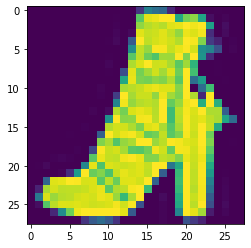

In [4]:
import matplotlib.pyplot as plt

plt.imshow(train_data[11]), train_label[11]

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
len(class_names)

10

In [6]:
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

train_data_norm.min(), train_data_norm.max(), test_data_norm.min(), test_data_norm.max()

(0.0, 1.0, 0.0, 1.0)

In [10]:
tf.random.set_seed(42)

model_fas = tf.keras.Sequential([
   tf.keras.layers.Flatten(input_shape=(28,28)), # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
   tf.keras.layers.Dense(128, activation='relu'), # increase one dense layer and epochs give more accuracy
   tf.keras.layers.Dense(64, activation='relu'),
   tf.keras.layers.Dense(32, activation='relu'),
   tf.keras.layers.Dense(10, activation='softmax')
])


model_fas.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

lr_schedular = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

history_fas = model_fas.fit(train_data, train_label, epochs=40)

Epoch 1/40
1875/1875 [==============================] - 8s 4ms/step - loss: 1.4217 - accuracy: 0.6219
Epoch 2/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6466 - accuracy: 0.7463
Epoch 3/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5393 - accuracy: 0.7912
Epoch 4/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4717 - accuracy: 0.8306
Epoch 5/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4226 - accuracy: 0.8473
Epoch 6/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4006 - accuracy: 0.8556
Epoch 7/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3804 - accuracy: 0.8645
Epoch 8/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3659 - accuracy: 0.8679
Epoch 9/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3522 - accuracy: 0.8725
Epoch 10/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.348

In [27]:
from sklearn.metrics import confusion_matrix
import numpy as np

y_probs = model_fas.predict(test_data)

y_pred = y_probs.argmax(axis=1)

cm = confusion_matrix(test_label, y_pred)
cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
# cm.shape[0]
# cm.astype("float")

# cm.astype("float"),cm.sum(axis=1)[:, np.newaxis]

313/313 [==============================] - 1s 3ms/step


array([[0.882, 0.01 , 0.017, 0.018, 0.004, 0.   , 0.063, 0.   , 0.006,
        0.   ],
       [0.004, 0.96 , 0.003, 0.028, 0.004, 0.   , 0.   , 0.   , 0.001,
        0.   ],
       [0.018, 0.006, 0.84 , 0.011, 0.076, 0.   , 0.047, 0.   , 0.002,
        0.   ],
       [0.034, 0.019, 0.01 , 0.87 , 0.039, 0.001, 0.024, 0.   , 0.003,
        0.   ],
       [0.003, 0.   , 0.151, 0.034, 0.768, 0.   , 0.04 , 0.   , 0.004,
        0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.97 , 0.   , 0.014, 0.001,
        0.015],
       [0.194, 0.007, 0.121, 0.033, 0.087, 0.001, 0.549, 0.   , 0.008,
        0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.01 , 0.   , 0.977, 0.   ,
        0.013],
       [0.004, 0.   , 0.004, 0.003, 0.004, 0.003, 0.014, 0.003, 0.965,
        0.   ],
       [0.001, 0.   , 0.   , 0.   , 0.   , 0.006, 0.   , 0.057, 0.   ,
        0.936]])

In [17]:
# Function for the confusion matrix 
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

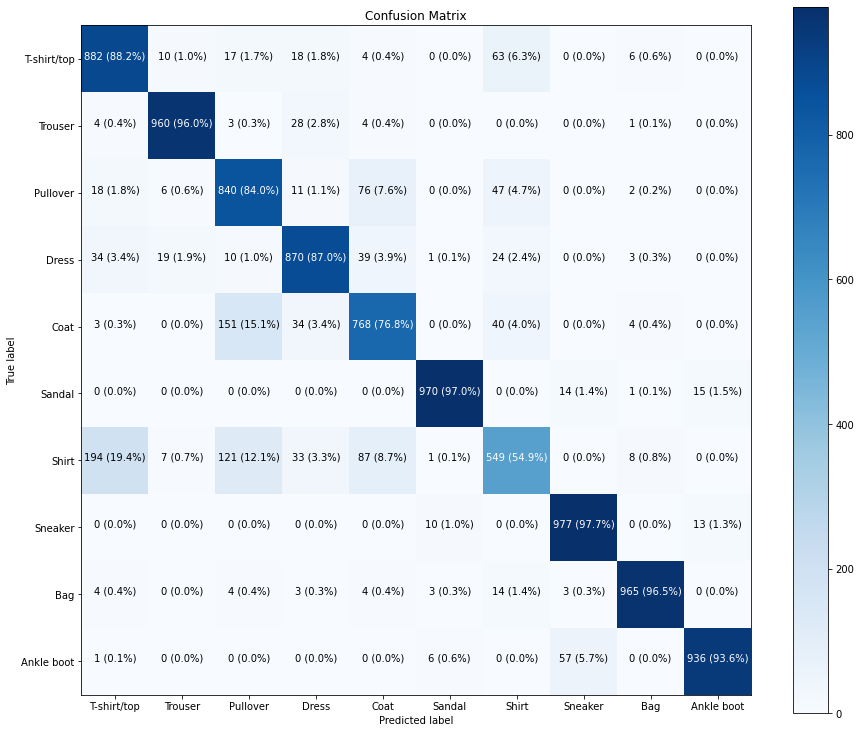

In [18]:
# Plotting the confusion matrix 
make_confusion_matrix(y_true = test_label , 
                      y_pred = y_pred , 
                      classes = class_names , 
                      figsize = (15 , 13), 
                      text_size = 10)

In [28]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [30]:
# Below function is from TensorFlow Tutorials (https://www.tensorflow.org/tutorials/keras/classification#verify_predictions)

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')



def plot_prediction_images():
  num_rows = 5 
  num_cols = 3
  num_images = num_rows * num_cols 
  plt.figure(figsize = (2*2*num_cols , 2*num_rows))
  for i in range(num_images):
    plt.subplot(num_rows , 2*num_cols , 2*i+1)
    plot_image(i , y_pred[i], test_label , test_data)
    plt.subplot(num_rows , 2*num_cols , 2*i+2)
    plot_value_array(i , y_pred[i] ,  test_label)
  plt.tight_layout()
  plt.show

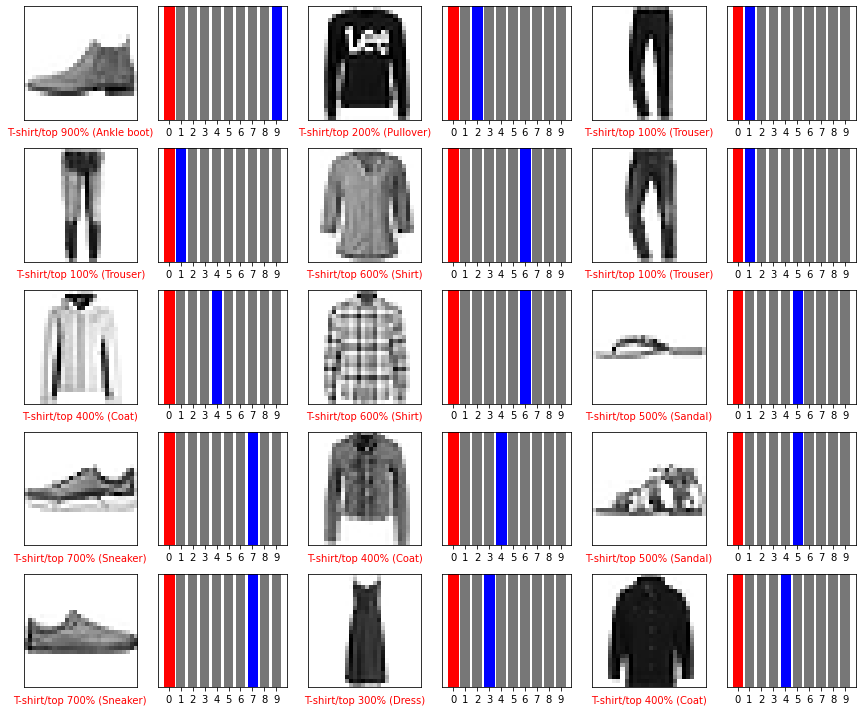

In [31]:
plot_prediction_images()